# k-NN classifier

In [14]:
import numpy as np                   # import numpy
import pandas as pd                  # import pandas
import matplotlib.pyplot as plt      # import matplotlib
from sklearn.model_selection import train_test_split
fruits = pd.read_table ('fruit_data_with_colors.txt')
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """


### Create Train_Test_Split

In [15]:
X = fruits[['mass','width','height']]
Y = fruits['fruit_label']
X_train,X_test,Y_train,Y_test = train_test_split(X , Y , random_state = 0)
# default is 75% / 25% train-test split

### Create Classifier object

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [17]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [18]:
knn.score(X_test,Y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [19]:
# first example: 
#               a small fruit with:
#                                   mass 20g, 
#                                   width 4.3 cm, 
#                                   height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [22]:
# first example: 
#               a larger fruit with:
#                                   mass 100g, 
#                                   width 6.3 cm, 
#                                   height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

/Users/rezarashetnia/Desktop/AI and Machine Learning/Fruit Classifier/adspy_shared_utilities.py:184: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
/Users/rezarashetnia/Desktop/AI and Machine Learning/Fruit Classifier/adspy_shared_utilities.py:185: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


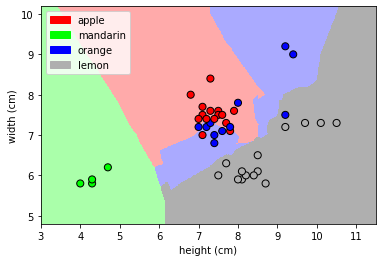

In [24]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, Y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

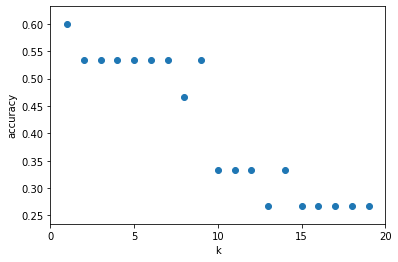

In [25]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

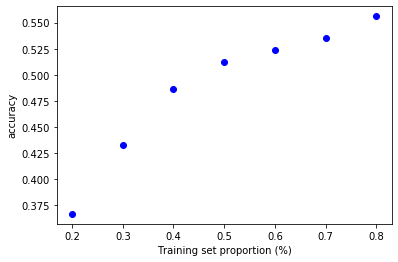

In [26]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1-s)
        knn.fit(X_train, Y_train)
        scores.append(knn.score(X_test, Y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');